# Proyecto Final Introducción a la Inteligencia Artificial
## Hotel booking demand
Para el proyecto se utiliza el siguiente set de datos: https://www.kaggle.com/datasets/mathsian/hotel-bookings

## Exploratory Data Analysis

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


A continuación extraemos las correlaciones del dataset y lo plasmamos en una matriz de correlación

In [22]:
corr_data = df.corr(numeric_only=True)

C:\Users\guimo\AppData\Local\Temp\ipykernel_8316\1568335698.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = ax.text(j, i, round(corr_data.iloc[i][j], 2),


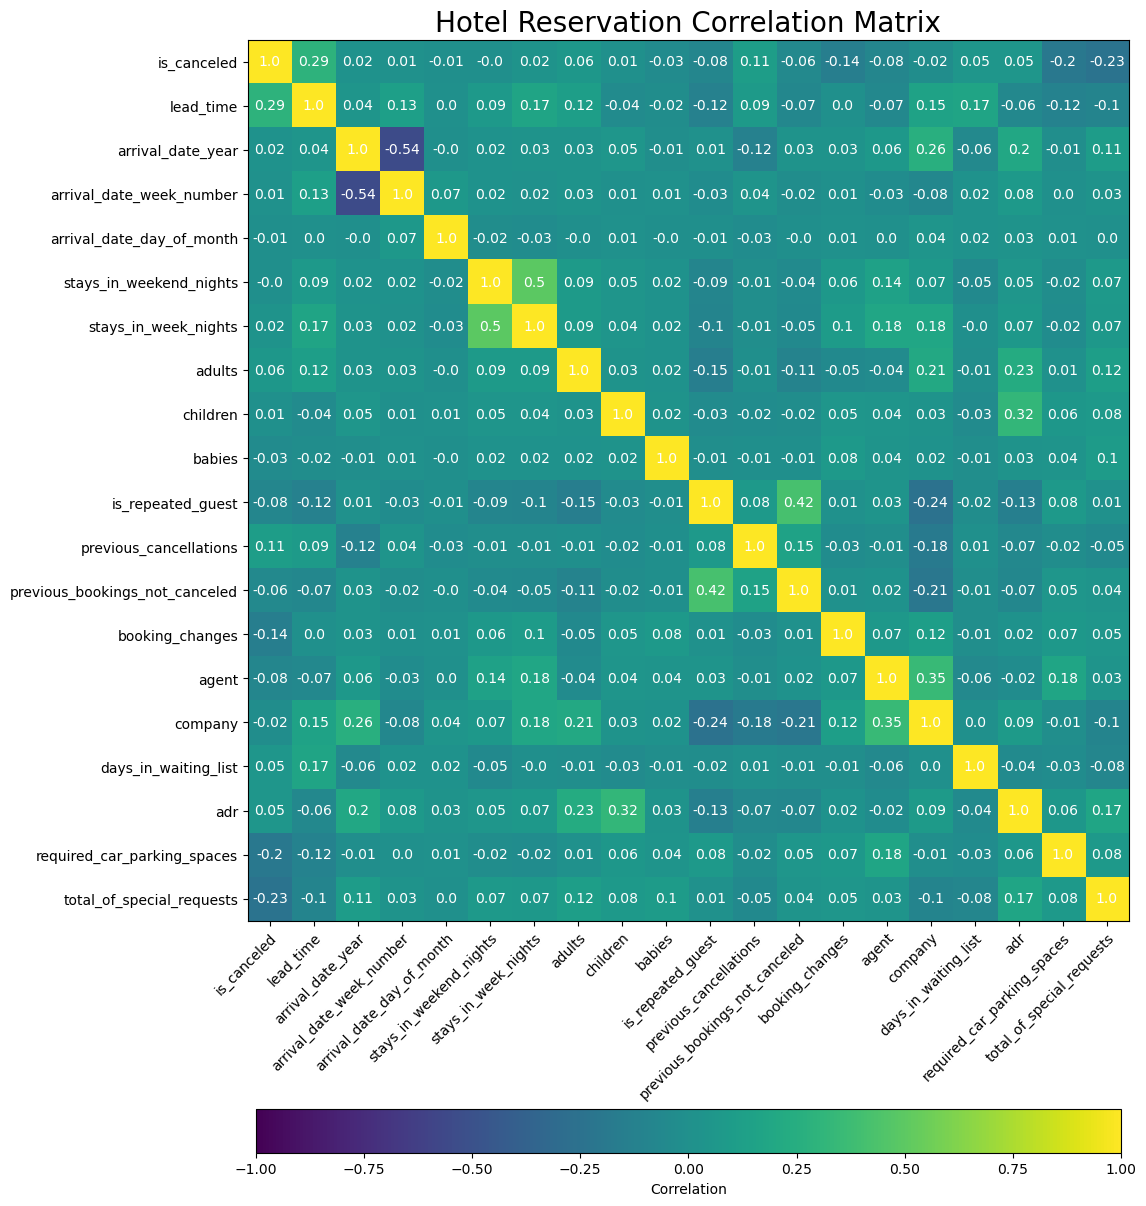

In [23]:
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(corr_data, vmin=-1, vmax=1)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(corr_data.columns)), labels=corr_data.columns)
ax.set_yticks(np.arange(len(corr_data.columns)), labels=corr_data.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr_data.columns)):
    for j in range(len(corr_data.columns)):
        text = ax.text(j, i, round(corr_data.iloc[i][j], 2),
                       ha="center", va="center", color="w")

ax.set_title("Hotel Reservation Correlation Matrix", fontsize=20)
fig.tight_layout()

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax, location="bottom", label="Correlation", shrink=0.7)
plt.show()

Como se muestra, las variables del dataset no se encuentran fuertemente correlacionadas.

In [24]:
# Identificamos las variables categóricas
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [25]:
# Creamos un dataframe con las variables categóricas
categoricals = df.select_dtypes(include='object')
categoricals

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-06
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2017-09-07
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2017-09-07
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-07


Creamos un plot de 12 figuras para representar la distribución de las variables. Limitamos el número de categorías a 20 para hacer la impresión de los gráficos más manejable.

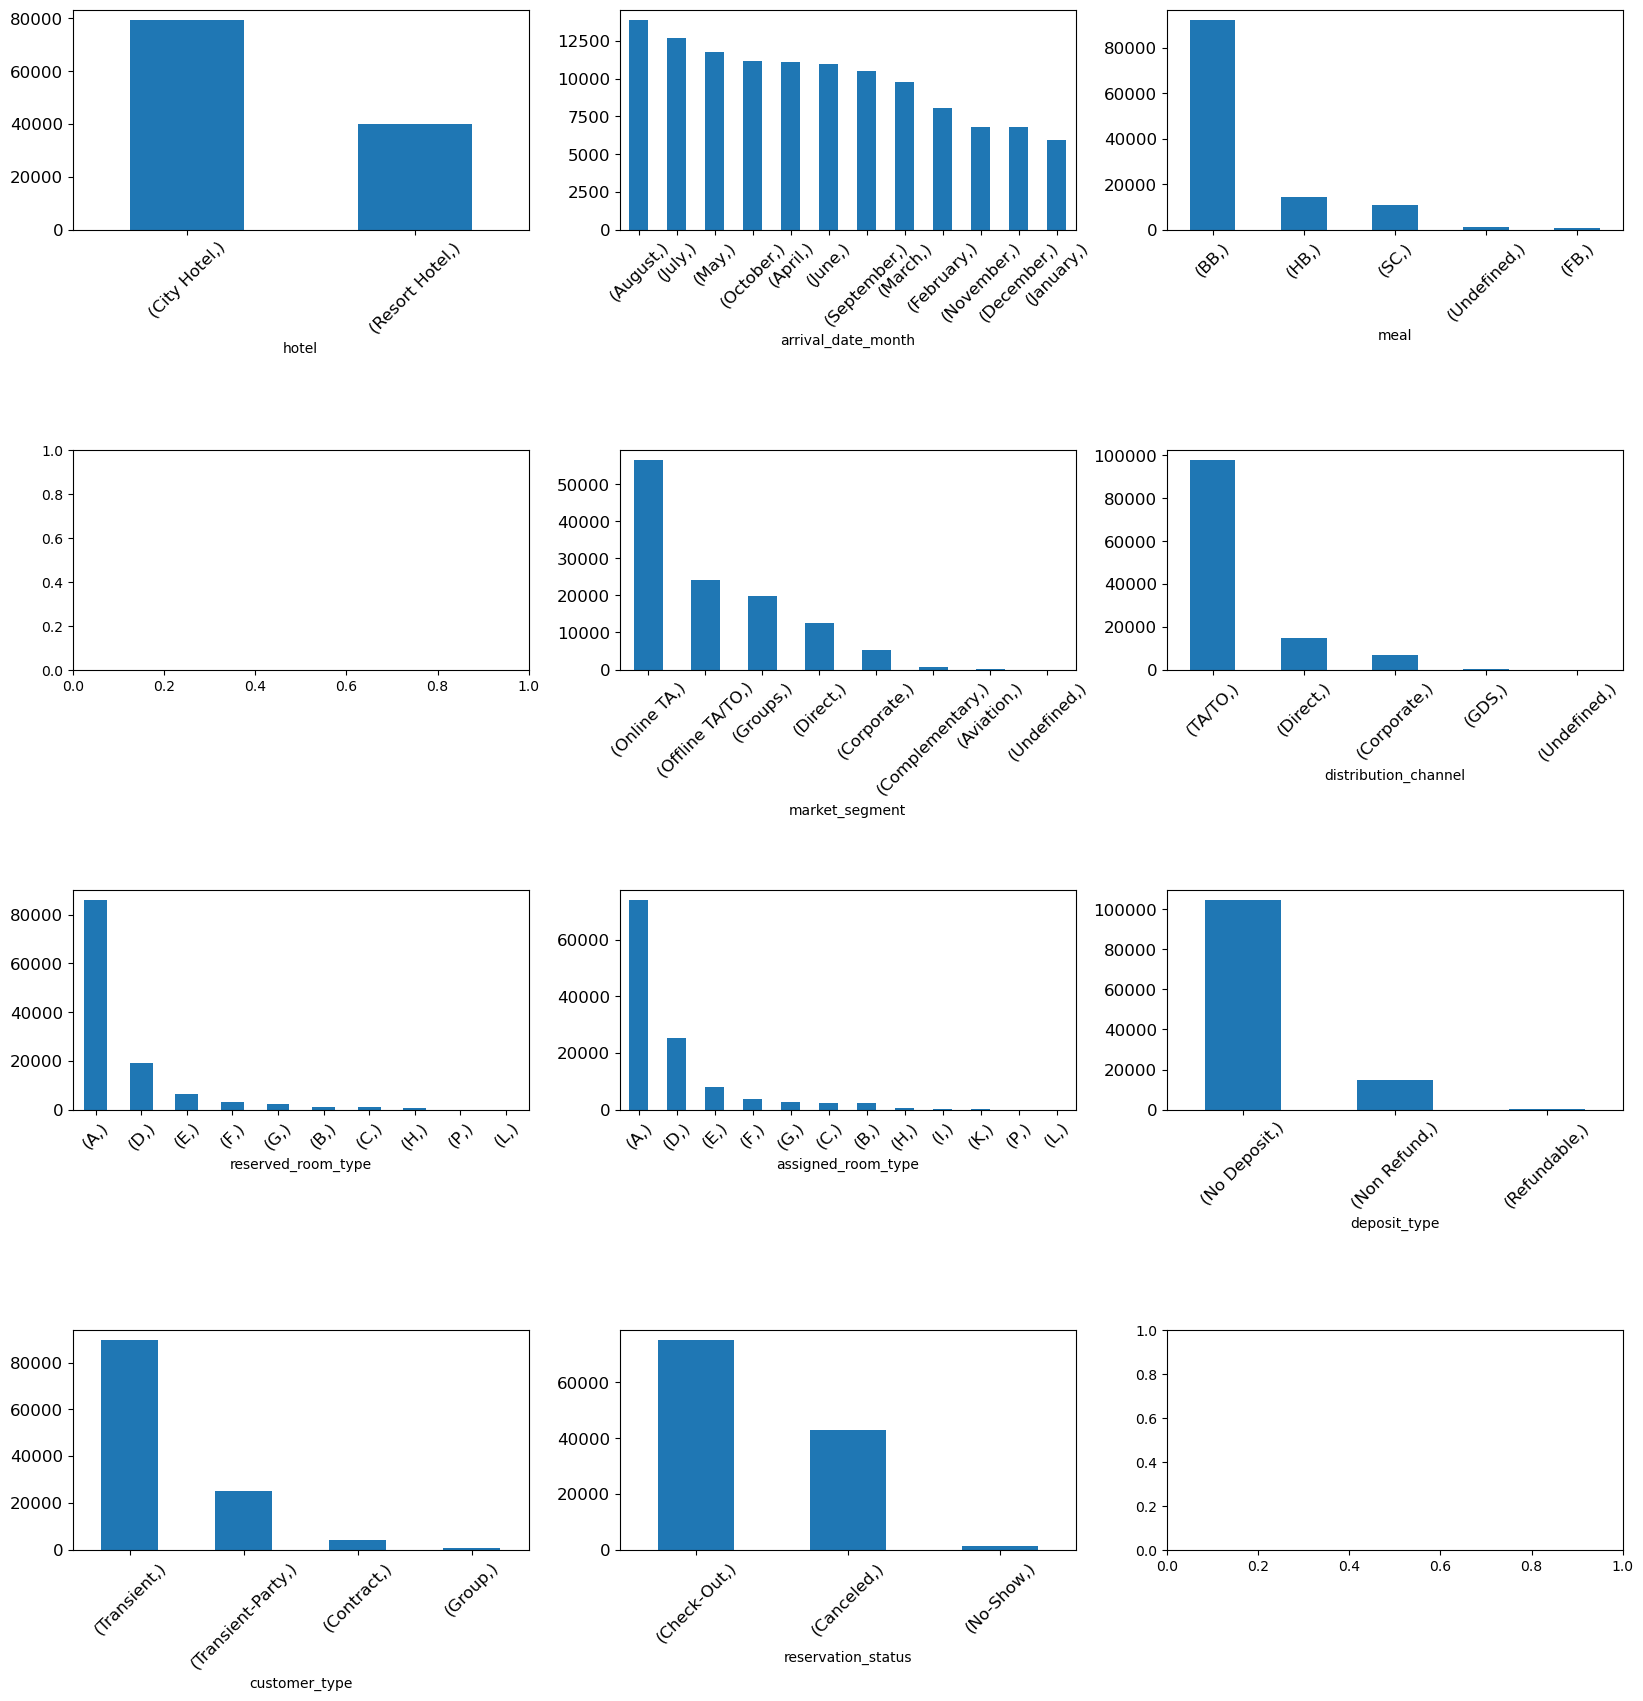

In [26]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
plt.subplots_adjust(hspace=1)

for i, ax in enumerate(axs.reshape(-1)):
    data = categoricals.iloc[:, [i]].value_counts()
    if len(data.index) <= 20: # No more than 20 categories
        data.plot(ax=ax, kind='bar', rot=45, fontsize=12)
    

Como se puede comprobar, el tipo de reservas que no cuentan con depósito previo **(deposit_type = 'No Deposit')** son la mayoría. Por tanto estos son casos de interés de cara a predecir posibles cancelaciones.

In [27]:
# Analizamos las variables numéricas
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [28]:
# Buscamos valores duplicados
df.duplicated().sum()

31994

Este este caso, hemos encontrado varias filas duplicadas con las que deberemos lidiar durante el preprocesamiento

In [29]:
# Buscamos valores nulos
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Como se puede comprobar, hay algunos valores nulos que también deberemos imputar en el preprocesamiento

<Axes: xlabel='is_canceled'>

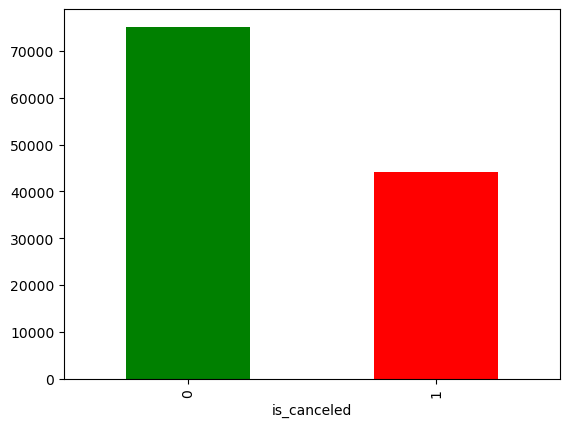

In [30]:
df.is_canceled.value_counts().plot.bar(color=['g', 'r'])

En este caso, la variable objetivo "is_canceled" se encuentra ligeramente desbalanceada. Quizá podamos mejorar el rendimiento por medio de Undersampling.

## Preprocesamiento

In [31]:
# Eliminamos duplicados ya que pueden causar overfitting
df.drop_duplicates(inplace=True)

Eliminamos las variables reservation_status, reservation_status_date y booking_changes ya que no es información que vayamos a disponer a la hora de la predicción y por tanto causan data leakage a la hora de predecir is_cancelled. Además eliminamos las reservas con una suma de huespedes igual a 0 ya que serían inválidas. También eliminamos company ya que en su mayoría son valores nulos y no aporta información al modelo. Eliminamos arrival_date_year ya que esta variable convierte nuestro dataset en time series.

In [32]:
df.drop(columns=['company', 'arrival_date_year', 'reservation_status_date','reservation_status','booking_changes'], inplace=True)
df.drop(df[df['adults'] + df['children'] + df['babies'] ==0].index, inplace = True)

In [33]:
# Transformamos los valores de agent a 1 si hay un valor distinto que 0 y 0 en cualquier otro caso
df['agent'] = df['agent'].apply(lambda x:1 if x!= 0 else 0)

In [34]:
# Definimos X y variable objetivo

X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

### Undersampling

<Axes: xlabel='is_canceled'>

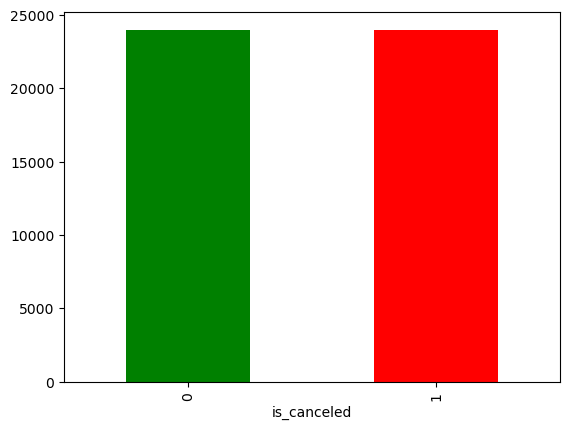

In [35]:
# Importamos el undersampler de imblearn y ajustamos la clase mayoritaria
from imblearn.under_sampling import RandomUnderSampler
seed = 100
rus = RandomUnderSampler(random_state=seed)
X_under, y_under = rus.fit_resample(X, y)

y_under.value_counts().plot.bar(color=['g', 'r'])

El dataset ahora está balanceado

### Definición de Pipelines

In [36]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    #('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

Usamos OrdinalEncoder ya que elimina complejidad del modelo (número de columnas) otorgándonos un mejor resultado. A continuación, aplicamos ColumnTransformer para ajustar las transformaciones a cada tipo de variable y después juntar todo en un set único.

In [38]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('Numeric Columns', num_pipeline, num_cols),
    ('Categorical Columns', cat_pipeline, cat_cols)
])

model_pipelines = [
    Pipeline([
        ('preprocessor', preprocessor),
        ('Classifier', GaussianNB())
    ]),
    Pipeline([
        ('preprocessor', preprocessor),
        ('Classifier', KNeighborsClassifier())
    ]),
    Pipeline([
        ('preprocessor', preprocessor),
        ('Classifier', LinearSVC(dual="auto", random_state=seed, tol=1e-5))
    ]),
    Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=seed))
    ]),
    Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=100000, solver='sag', random_state=seed))
    ])
]

En este dataset, hemos optado por no hacer reducción de dimensionalidad ya que afecta negativamente al rendimiento de los modelos de clasificación. Hemos incluido pipelines con los siguientes tipos de clasificadores:
* Gaussian Naive Bayes
* KNN vote
* Linear Support Vector Classification
* Random Forest Classifier
* Logistic Regression

## Cross Validation

In [39]:
from sklearn.model_selection import cross_val_score

for i, pipeline in enumerate(model_pipelines):
    scores = cross_val_score(pipeline, X_under, y_under, scoring='f1', cv=5)
    print(f'Pipeline {i}:', scores, f'Promedio: {np.mean(scores)}')

Pipeline 0: [0.68838419 0.68475472 0.70516264 0.70483668 0.6866772 ] Promedio: 0.6939630848264869
Pipeline 1: [0.57364341 0.62438079 0.6503489  0.5609258  0.623693  ] Promedio: 0.6065983805656421
Pipeline 2: [0.42003471 0.70043918 0.7198043  0.63139636 0.73375672] Promedio: 0.6410862536441242
Pipeline 3: [0.36752376 0.5618964  0.57014702 0.35836817 0.60579118] Promedio: 0.4927453061122048
Pipeline 4: [0.40736537 0.70253619 0.71881737 0.6314064  0.7377499 ] Promedio: 0.6395750475739599


Como se muestra, obtenemos el mejor resultado de clasificación mediante Gaussian Naive Bayes

## Evaluación

Procedemos a hacer una evaluación del modelo con el pipeline que mejor rendimiento nos ha aportado

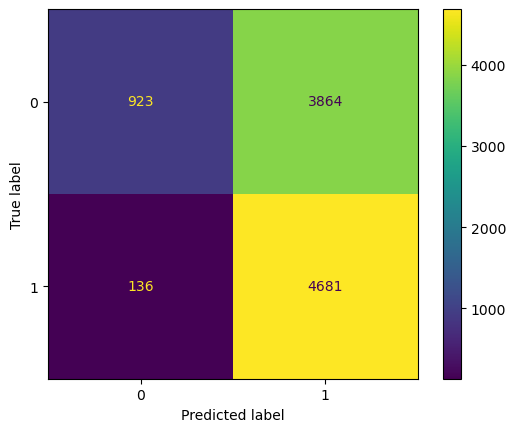

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split

# Predicting Test set results
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size = 0.2, random_state = seed)
model_pipelines[0].fit(X_train, y_train)
y_pred = model_pipelines[0].predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_pipelines[0].classes_)
disp.plot()

Como se puede comprobar, nuestro modelo tiene una gran inclinación hacia los falsos positivos (error de tipo 1) lo cual afecta de forma negativa a nuestro score para precission. Esto puede no suponer un inconveniente si nuestra intención es simplemente comunicarnos con los clientes "indecisos" pero puede ser inadecuado si nuestra intención es volver a vender las habitaciones a otros clientes.

In [59]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred)) 
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred)) 

Accuracy: 0.5835068721366098
Precision: 0.5478057343475716
Recall: 0.9717666597467304
F1 score: 0.700643616225116
